# Data Description:
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

# Domain:
Banking


# Attribute Information:
Input variables:

# bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6- balance – average yearly balance in euros(numeric) <br>
7 - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
8 - loan: has personal loan? (categorical: 'no','yes','unknown') <br>
# related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone') <br>
10 - day: last contact day of the month (categorical: 'mon','tue','wed','thu','fri') <br>
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. <br>

# other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <br>
15 - previous: number of contacts performed before this campaign and for this client (numeric) <br>
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') <br>

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: 'yes','no') <br>


# Learning Outcomes:
• Exploratory Data Analysis <br>
• Preparing the data to train a model <br>
• Training and making predictions using a classification model <br>
• Model evaluation <br>

Objective:
The classification goal is to predict the likelihood of a liability customer
buying personal loans.

In [96]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math # log function is inside this library
# this is used to get the plots inline i.e. in the same page
from collections import Counter
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# 1. Read the column description and ensure you understand each attribute well

In [171]:
# read the csv file into a dataframe
df_bank_data=pd.read_csv("Bank-full.csv")
df_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df_bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [172]:
df_bank_data.info()  #check null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [173]:
df_bank_data.isnull().values.sum()  #check for null values

0

In [174]:
df_bank_data.isnull().values.any() #check for missing values

False

In [175]:
#EDA
df_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
df_bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Observations :-  <br>

# Columns Types

### Categorical Feature:


- Job <br>
- Marital <br>
- Education <br>
- Default <br>
- Default <br>
- Balance <br>
- Loan <br>
- Housing <br>
- Contact <br>
- Day <br>
- Month <br>
- pOutcome <br>

### Numerical feature:
    
- Balance <br>
- Duration <br>
- Compaign <br>
- PDays <br>
- Previous <br>

# Data
No null values <br>
No missing values  <br>

# Plot histograms for continuous variables
Univariate Variable

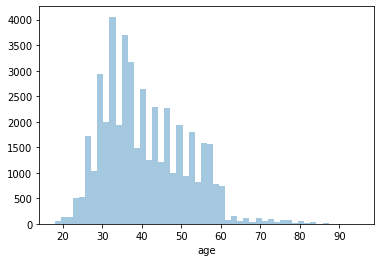

In [176]:
sns.distplot(df_bank_data['age'],kde=False)

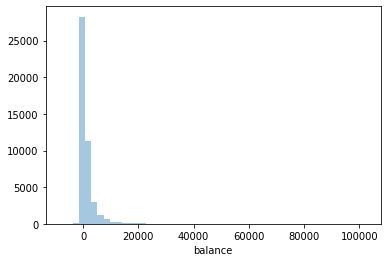

In [177]:
sns.distplot(df_bank_data['balance'],kde=False)

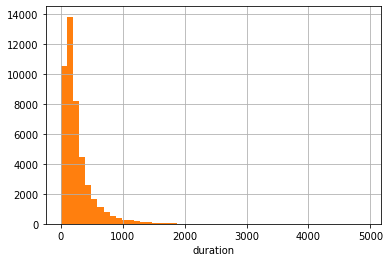

In [178]:
sns.distplot(df_bank_data['duration'],kde=False)
df_bank_data['duration'].hist(bins=50)

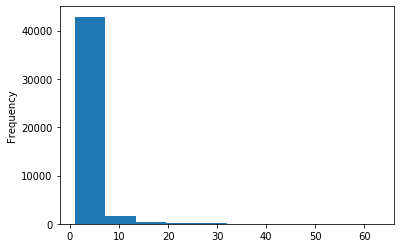

In [179]:
df_bank_data['campaign'].plot(kind='hist')

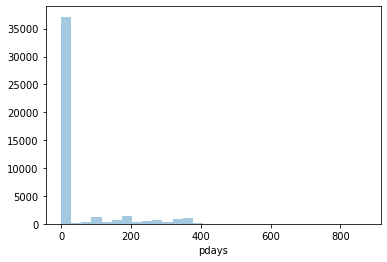

In [181]:
sns.distplot(df_bank_data['pdays'],kde=False, bins = 30)

# Observation

pdays are higly skewed

# Checking the presence of outliers and skewness

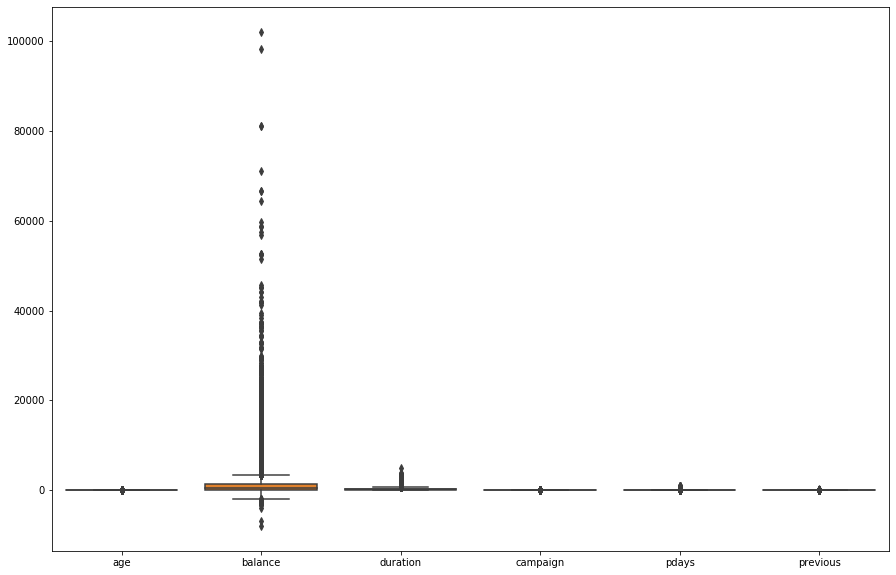

In [15]:
# Boxplot
plt.figure(figsize=(15,10))

temp_df = df_bank_data.drop(['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome'], axis=1)
sns.boxplot(data=temp_df)

In [182]:
temp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Observation

Balance, pdays, duration and and previous have outliers

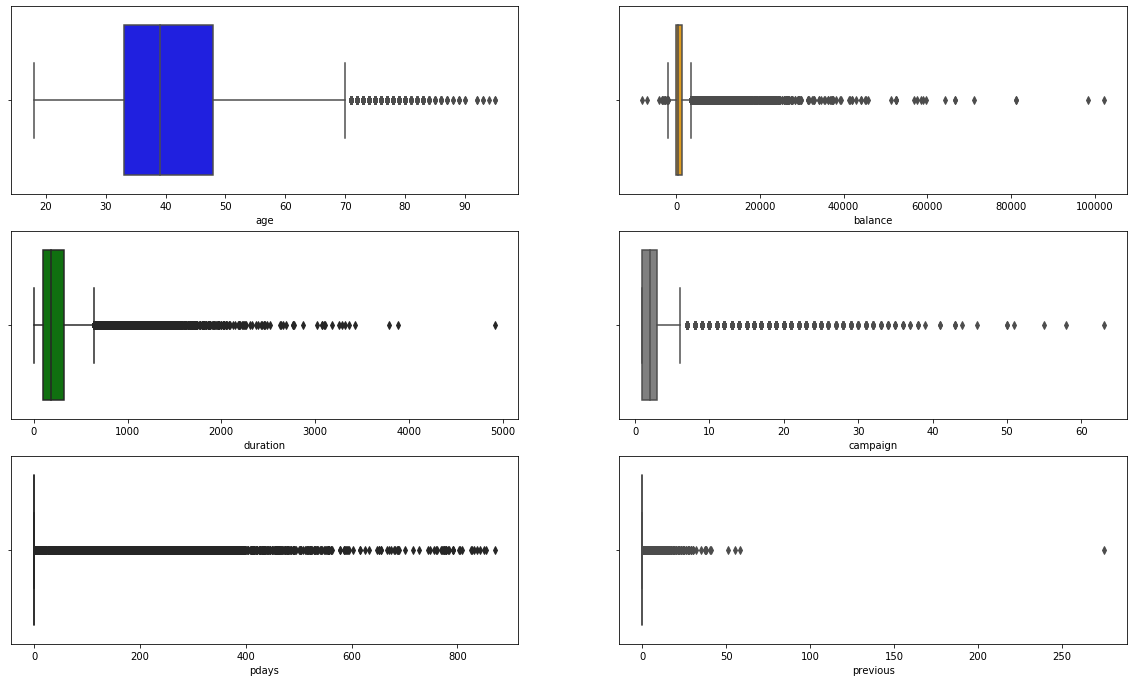

In [17]:
plt.figure(figsize= (20,20))
plt.subplot(5,2,1)
sns.boxplot(x= df_bank_data.age, color='blue')

plt.subplot(5,2,2)
sns.boxplot(x= df_bank_data.balance, color='orange')

plt.subplot(5,2,3)
sns.boxplot(x= df_bank_data.duration, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= df_bank_data.campaign, color='grey')

plt.subplot(5,2,5)
sns.boxplot(x= df_bank_data.pdays, color='purple')

plt.subplot(5,2,6)
sns.boxplot(x= df_bank_data.previous, color='red')


## Inference
- Balance, duration and pdays has outliers


In [31]:
#Describing dummy keys of particular column
y_n_lookup ={'yes' : 1, 'no' : 0}
df_bank_data['y_dummy'] = df_bank_data['Target'].map(lambda x: y_n_lookup[x])
df_bank_data['y_dummy'].value_counts()

0    39922
1     5289
Name: y_dummy, dtype: int64

In [34]:
#getting marital status of groupby people
age_group_names = ['young', 'lower middle', 'middle', 'senior']
df_bank_data['age_binned'] = pd.qcut(df_bank_data['age'], 4, labels = age_group_names)
gb_marital_age = df_bank_data['y_dummy'].groupby([df_bank_data['marital'],df_bank_data['age_binned']] ) 
gb_marital_age.value_counts()

marital   age_binned    y_dummy
divorced  young         0           497
                        1            59
          lower middle  0           935
                        1           110
          middle        0          1424
                        1           159
          senior        0          1729
                        1           294
married   young         0          4578
                        1           446
          lower middle  0          5632
                        1           590
          middle        0          6902
                        1           607
          senior        0          7347
                        1          1112
single    young         0          6226
                        1          1277
          lower middle  0          2653
                        1           359
          middle        0          1373
                        1           196
          senior        0           626
                        1            80
Name: y_

## Categorical Column Analysis

In [18]:
pd.DataFrame(df_bank_data['Target'].value_counts().to_frame()).T

,no,yes
Target,39922,5289


In [44]:
pd.DataFrame(df_bank_data['education'].value_counts().to_frame()).T

,secondary,tertiary,primary,unknown
education,23202,13301,6851,1857


In [45]:
pd.DataFrame(df_bank_data['marital'].value_counts().to_frame()).T

,married,single,divorced
marital,27214,12790,5207


In [46]:
pd.DataFrame(df_bank_data['default'].value_counts().to_frame()).T

,no,yes
default,44396,815


In [47]:
pd.DataFrame(df_bank_data['housing'].value_counts().to_frame()).T

,yes,no
housing,25130,20081


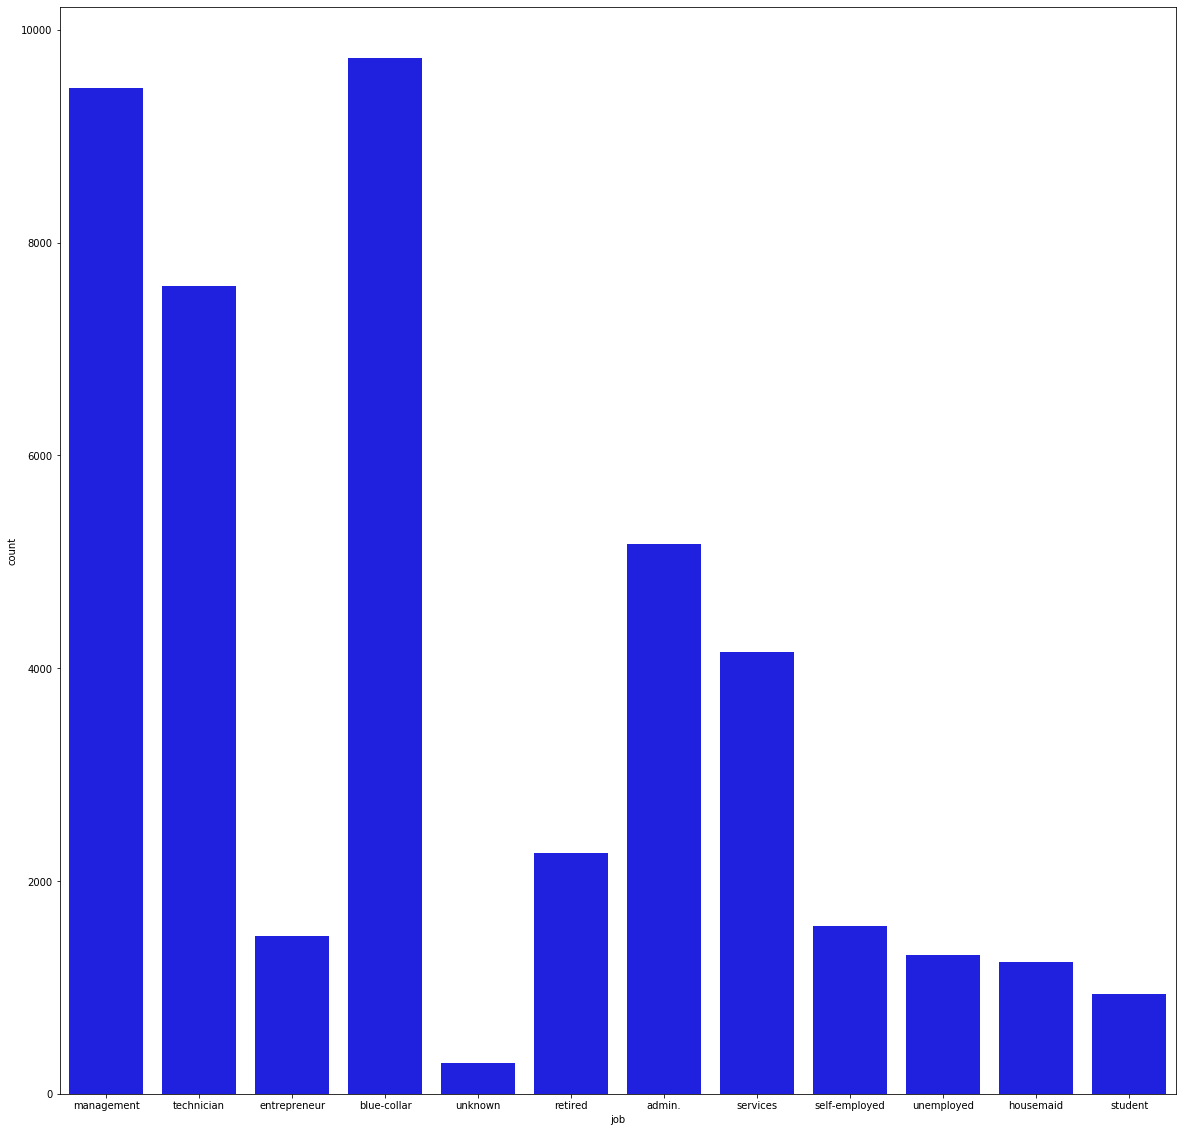

In [50]:
plt.figure(figsize=(20,20))
sns.countplot(df_bank_data['job'],color = 'blue')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


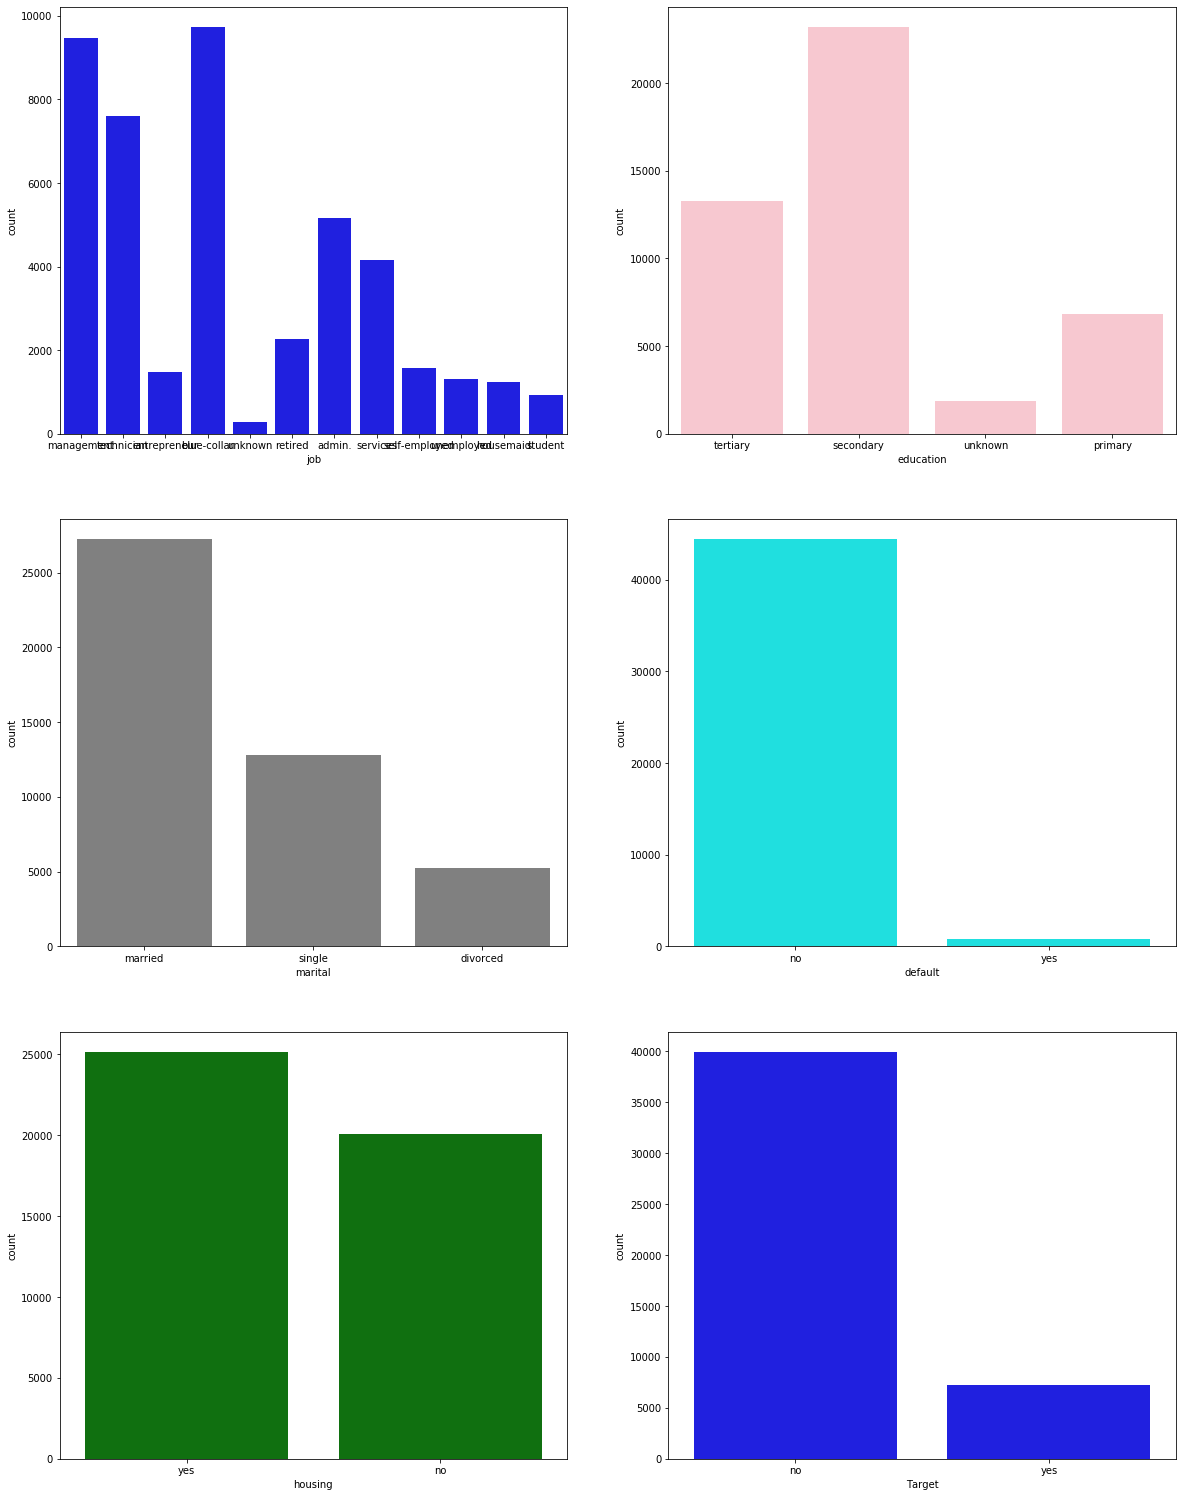

In [105]:
plt.figure(figsize=(20,55))

plt.subplot(6,2,1)
sns.countplot(df_bank_data['job'],color = 'blue')


plt.subplot(6,2,2)
sns.countplot(df_bank_data['education'],color = 'pink')

plt.subplot(6,2,3)
sns.countplot(df_bank_data['marital'],color = 'grey')

plt.subplot(6,2,4)
sns.countplot(df_bank_data['default'],color = 'cyan')

plt.subplot(6,2,5)
sns.countplot(df_bank_data['housing'],color = 'green')

plt.subplot(6,2,6)
sns.countplot(df_bank_data['loan'],color = 'blue')

plt.subplot(6,2,6)
sns.countplot(df_bank_data['Target'],color = 'blue')

# Observations: <br>
* ## Dependent Variable <br>
Term Deposit (5289/45211) = 11.6% have subscribed to term deposit <br><br>

* ## Independent Variable <br>
By default very few ppl have credit ie  (815/45211)  ie  1.8% <br>
Ppl with secondary education are highest ie (23202/45211) ie 51%
Married ppl are highest ie (27214/45211) ie 60%

# Relationship between Target and other independent variables

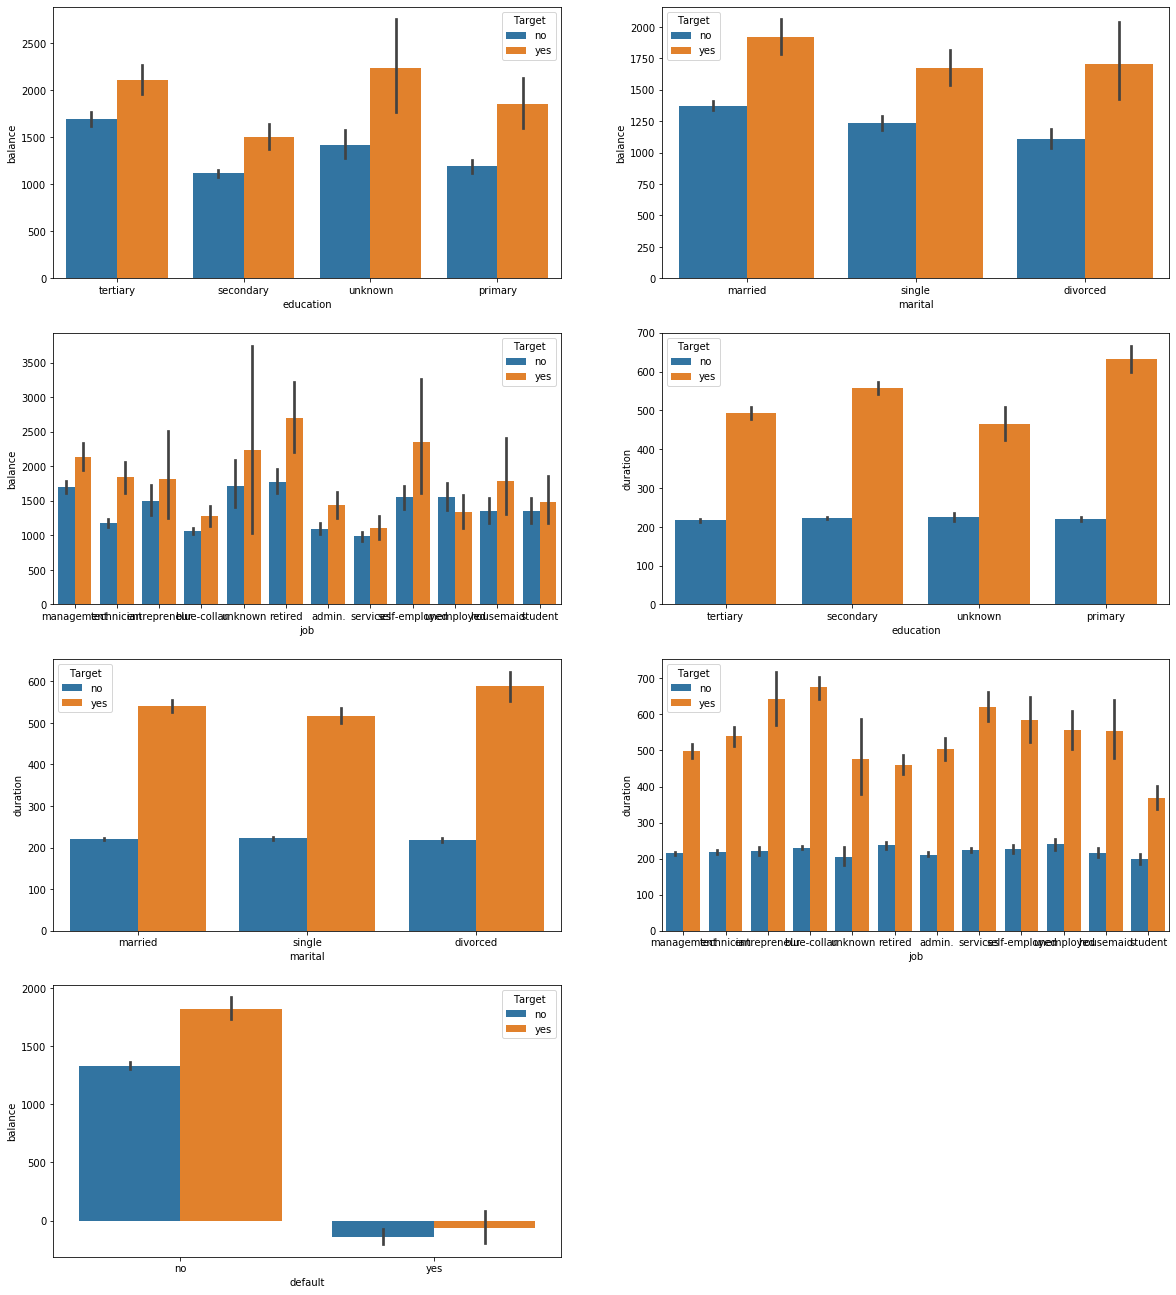

In [124]:
plt.figure(figsize=(20,35))

plt.subplot(6,2,1)
sns.barplot(df_bank_data['education'], df_bank_data['balance'], hue=df_bank_data['Target'])

plt.subplot(6,2,2)
sns.barplot(df_bank_data['marital'], df_bank_data['balance'], hue=df_bank_data['Target'])

plt.subplot(6,2,3)
sns.barplot(df_bank_data['job'], df_bank_data['balance'], hue=df_bank_data['Target'])

plt.subplot(6,2,4)
sns.barplot(df_bank_data['education'], df_bank_data['duration'], hue=df_bank_data['Target'])

plt.subplot(6,2,5)
sns.barplot(df_bank_data['marital'], df_bank_data['duration'], hue=df_bank_data['Target'])

plt.subplot(6,2,6)
sns.barplot(df_bank_data['job'], df_bank_data['duration'], hue=df_bank_data['Target'])

plt.subplot(6,2,7)
sns.barplot(df_bank_data['default'], df_bank_data['balance'], hue=df_bank_data['Target'])

# Observations: <br>

*Higher ratio of people with employment in various sectors seems to have spoken for longer duration.  <br>
*Marital status doesnt have much impact on subscription to term deposit. <br>

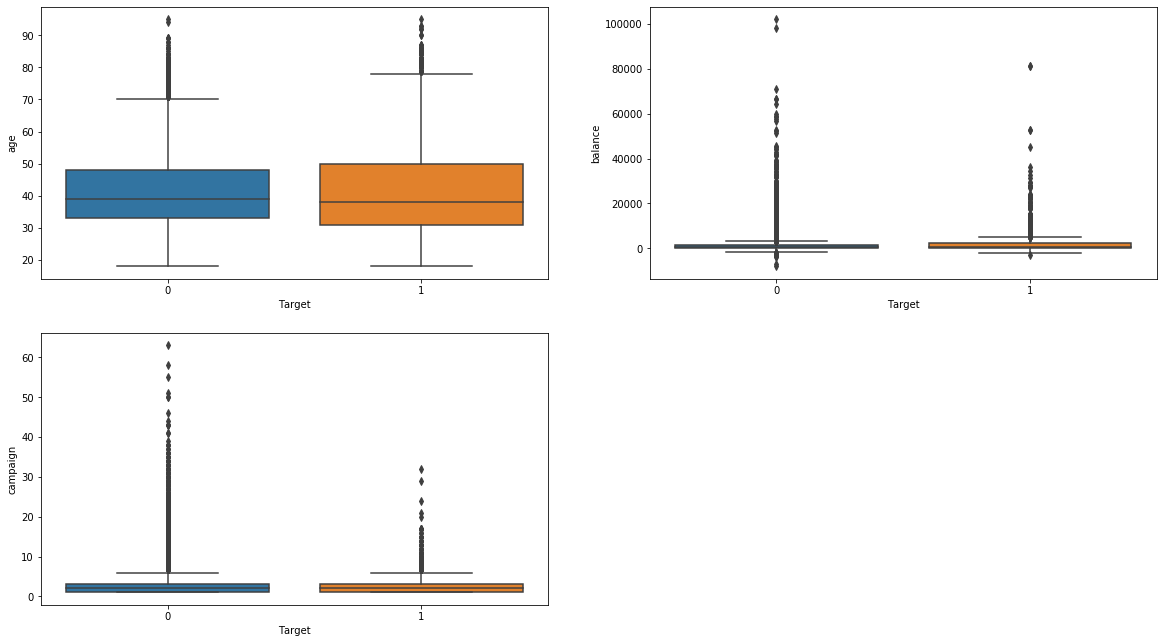

In [130]:
plt.figure(figsize=(20,35))

plt.subplot(6,2,1)
sns.boxplot(x="Target",y="age",data=df_bank_data)

plt.subplot(6,2,2)
sns.boxplot(x="Target",y="balance",data=df_bank_data) 

plt.subplot(6,2,3)
sns.boxplot(x="Target",y="campaign",data=df_bank_data) 


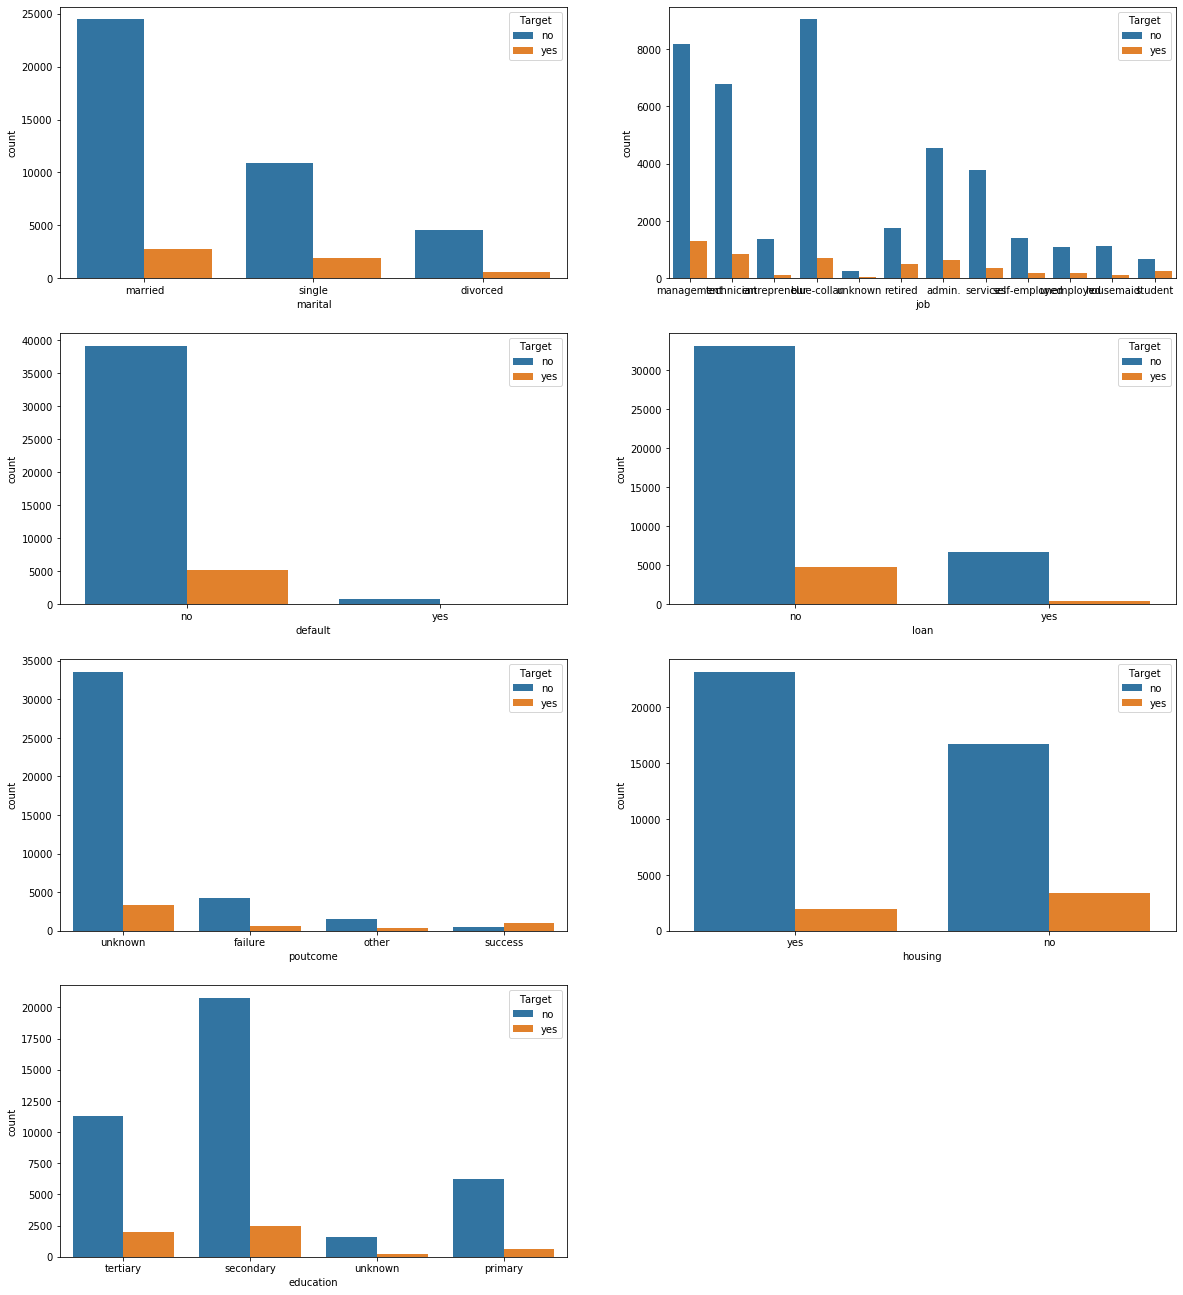

In [135]:
plt.figure(figsize=(20,35))

plt.subplot(6,2,1)
sns.countplot(x="marital", data=df_bank_data ,hue="Target")

plt.subplot(6,2,2)
sns.countplot(x="job", data=df_bank_data ,hue="Target")

plt.subplot(6,2,3)
sns.countplot(x="default", data=df_bank_data ,hue="Target")

plt.subplot(6,2,4)
sns.countplot(x="loan", data=df_bank_data ,hue="Target")

plt.subplot(6,2,5)
sns.countplot(x="poutcome", data=df_bank_data ,hue="Target")

plt.subplot(6,2,6)
sns.countplot(x="housing", data=df_bank_data ,hue="Target")

plt.subplot(6,2,7)
sns.countplot(x="education", data=df_bank_data ,hue="Target")

## Observation  
- People with no housing loan, no default credit and no personal loan are more prone to subscribe to term deposit
- Marital status does not affect the Target variable a lot
- People with higher education tend to subscribe more to the term deposit.

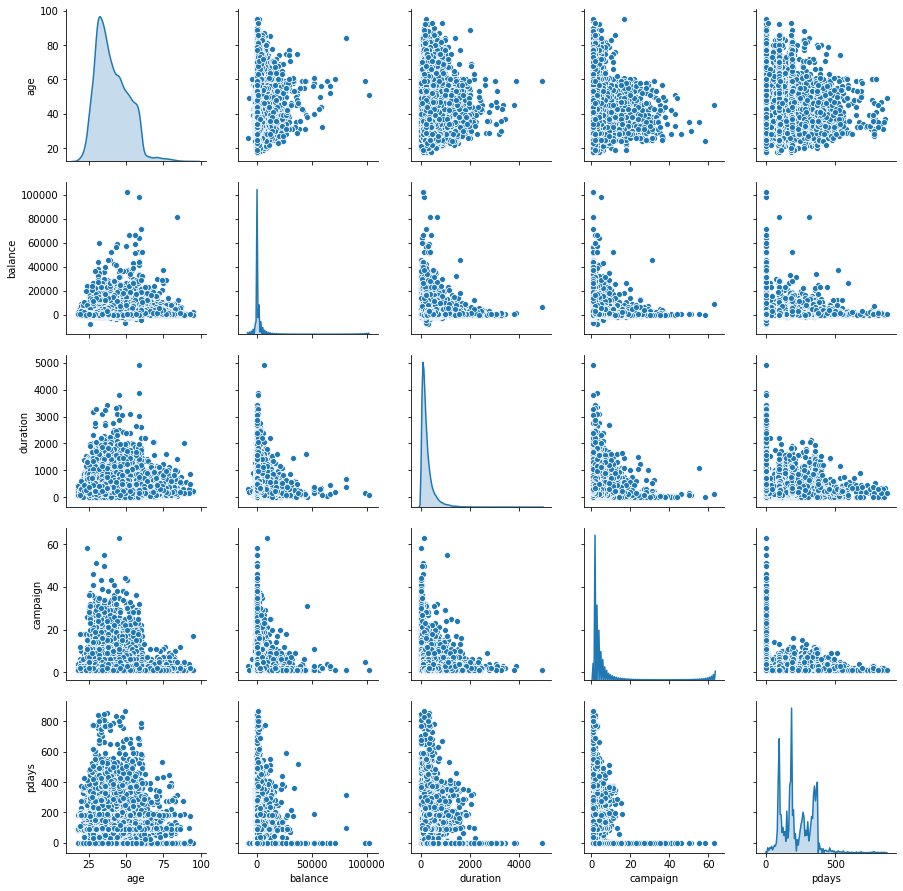

In [140]:
Pairplot_bank_df = df_bank_data.drop(['job','marital','education','default','housing','loan','contact','day','month','previous'], axis=1)
sns.pairplot(Pairplot_bank_df, diag_kind='kde')

# Converting categorical string values to numeric

In [183]:
df_bank_data.marital = df_bank_data.marital.map({'married':0, 'single':1, 'divorced':2, 'unknown':3})
df_bank_data.education = df_bank_data.education.map({'primary':0, 'secondary':1, 'tertiary':2, 'unknown':3})
df_bank_data.default  = df_bank_data.default.map({'no':0, 'unknown':2, 'yes':1})
df_bank_data.housing  = df_bank_data.housing.map({'no':0, 'unknown':2, 'yes':1})
df_bank_data.loan = df_bank_data.loan.map({'no':0, 'unknown':2, 'yes':1})
df_bank_data.contact = df_bank_data.contact.map({'cellular':0, 'telephone':1, 'unknown': 2})
df_bank_data.month = df_bank_data.month.map({'jan':1,'feb':2,'may':5, 'jun':6, 'nov':11, 'sep':9, 'jul':7, 'aug':8, 'mar':3, 'oct':10, 'apr':4, 'dec':12})
df_bank_data.poutcome = df_bank_data.poutcome.map({'other':2, 'failure':0, 'success':1, 'unknown':3})

In [184]:

df_bank_data['job'] = df_bank_data.job.map({'blue-collar':0,'services':1,'admin.':2, 'entrepreneur':3,'self-employed':4, 'technician':5, 'management':6, 'student':7, 'retired':8,'housemaid':9, 'unemployed':10, 'unknown':11})

In [187]:
df_bank_data['Target'] = df_bank_data['Target'].replace({'yes': 1, 'no': 0})

In [188]:
df_bank_data.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
Target       int64
dtype: object

In [189]:
df_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,6,0,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,5,1,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,3,0,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,0,0,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,1,3,0,1,0,0,2,5,5,198,1,-1,0,3,0


# Cleaning and splitting data

In [190]:
#Changing dataset into array type 
array = df_bank_data.values
#Taking all predictive variables to x dataset
x = array[:,0:16]

y = array[:,16]
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [191]:
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.606965,0.74187,-0.740666,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,-0.475354,0.011016,-0.569351,-0.411453,-0.25194,0.441044
1,0.288529,0.40384,0.702458,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,-0.475354,-0.416127,-0.569351,-0.411453,-0.25194,0.441044
2,-0.747384,-0.27222,-0.740666,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,-0.475354,-0.707361,-0.569351,-0.411453,-0.25194,0.441044
3,0.571051,-1.28631,-0.740666,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,-0.475354,-0.645231,-0.569351,-0.411453,-0.25194,0.441044
4,-0.747384,2.43202,0.702458,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,-0.475354,-0.233620,-0.569351,-0.411453,-0.25194,0.441044


In [192]:
x.rename(columns={0:'Age',1:'Job',2:'Marital',3:'Education',4:'Default',5:'Balance',6:'Housing',7:'Loan',8:'Contact',9:'Day_of_week',10:'Month',11:'Duration',12:'Campaign',13:'Pday',14:'Previous', 15:'Poutcome'},inplace=True)

In [193]:
ScaledBankData  = pd.DataFrame(x)
ScaledBankData.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day_of_week,Month,Duration,Campaign,Pday,Previous,Poutcome
0,1.606965,0.74187,-0.740666,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,-0.475354,0.011016,-0.569351,-0.411453,-0.25194,0.441044
1,0.288529,0.40384,0.702458,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,-0.475354,-0.416127,-0.569351,-0.411453,-0.25194,0.441044
2,-0.747384,-0.27222,-0.740666,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,-0.475354,-0.707361,-0.569351,-0.411453,-0.25194,0.441044
3,0.571051,-1.28631,-0.740666,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,-0.475354,-0.645231,-0.569351,-0.411453,-0.25194,0.441044
4,-0.747384,2.43202,0.702458,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,-0.475354,-0.233620,-0.569351,-0.411453,-0.25194,0.441044


In [194]:
ScaledBankData.corr()  #correlation between income and personal loan is considerable

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day_of_week,Month,Duration,Campaign,Pday,Previous,Poutcome
Age,1.000000,0.176163,-0.126351,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,-0.003707
Job,0.176163,1.000000,0.060030,0.296752,-0.011145,0.079597,-0.259097,-0.074248,-0.128783,0.017902,0.094043,0.004450,-0.006861,-0.035152,0.011702,-0.007514
Marital,-0.126351,0.060030,1.000000,0.080759,0.018404,-0.028172,-0.011671,-0.018526,-0.017638,-0.005217,-0.044321,0.018834,-0.029294,0.020832,0.006876,-0.009841
Education,-0.106807,0.296752,0.080759,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,0.054729,0.001935,0.006255,0.000052,0.017570,-0.028406
Default,-0.017879,-0.011145,0.018404,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,0.036545
Balance,0.097783,0.079597,-0.028172,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,-0.025886
Housing,-0.185513,-0.259097,-0.011671,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,-0.076039
Loan,-0.015655,-0.074248,-0.018526,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,0.023588
Contact,0.026221,-0.128783,-0.017638,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,-0.173779,-0.020839,0.019614,-0.244816,-0.147811,0.271415
Day_of_week,-0.009120,0.017902,-0.005217,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,0.083046


# My findings:-
Housing and Durationare somewhat correlated with term deposit <br>


In [30]:
array = ScaledBankData.values
array

array([[ 1.60696496,  0.74187018, -0.74066636, ..., -0.25194037,
         0.44104414, -0.36398261],
       [ 0.28852927,  0.40384014,  0.70245839, ..., -0.25194037,
         0.44104414, -0.36398261],
       [-0.74738448, -0.27221994, -0.74066636, ..., -0.25194037,
         0.44104414, -0.36398261],
       ...,
       [ 2.92540065,  1.41793025, -0.74066636, ...,  1.05047333,
        -1.59729439,  2.74738398],
       [ 1.51279098, -1.28631006, -0.74066636, ..., -0.25194037,
         0.44104414, -0.36398261],
       [-0.37068857, -0.27221994, -0.74066636, ...,  4.52357654,
        -0.57812512, -0.36398261]])

# Split X and y into training and test set in 70:30 ratio

In [195]:
x_train,x_validation,y_train,Y_validation =      model_selection.train_test_split(x,y,test_size=.30,random_state=1)

In [196]:
x_validation.shape

(13564, 16)

## Logistic Regression

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import model_selection
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
predictModel = logmodel.predict(x_validation)
predictProb = logmodel.predict_proba(x_validation)

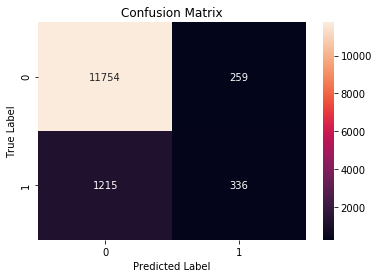

In [209]:
# Confusion Matrix
cm = confusion_matrix(Y_validation, predictModel ,  labels=[0, 1])

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm,  index = [i for i in [0,1]], columns = [i for i in [0,1]])
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [201]:
# Classification Report
print(classification_report(Y_validation, predictModel))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.22      0.31      1551

    accuracy                           0.89     13564
   macro avg       0.74      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



# KNN Modelling

In [202]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


In [203]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [204]:

predicted_labels = NNH.predict(x_validation)
NNH.score(x_validation, Y_validation)

0.8939840754939545

# Confusion Matrix

Confusion Matrix


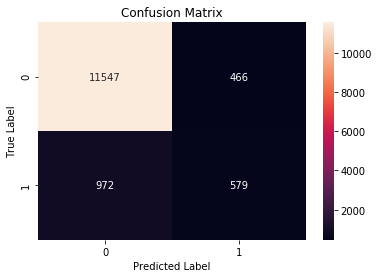

In [208]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm1=confusion_matrix(Y_validation, predicted_labels,  labels=[0, 1])
class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = [i for i in [0,1]], columns = [i for i in [0,1]])
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [524]:
# Classification Report
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.55      0.36      0.43       149

    accuracy                           0.91      1500
   macro avg       0.74      0.66      0.69      1500
weighted avg       0.89      0.91      0.90      1500



# Train Naive Bayes algorithm

In [120]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [121]:
naive_bayes_model_predict_train = naive_bayes_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, naive_bayes_model_predict_train)))
print()

Model Accuracy: 0.8212



In [122]:
naive_bayes_model_predict_test = naive_bayes_model.predict(x_validation)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_validation, naive_bayes_model_predict_test)))
print()

Model Accuracy: 0.8220



Confusion Matrix


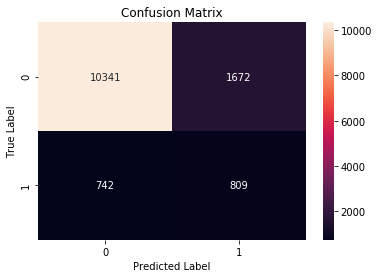

In [143]:
print("Confusion Matrix")
cm2=metrics.confusion_matrix(Y_validation, naive_bayes_model_predict_test, labels=[0, 1])

df_cm2 = pd.DataFrame(cm2, index = [i for i in [0,1]], columns = [i for i in [0,1]])
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [124]:
print("Classification Report")
print(classification_report(Y_validation, naive_bayes_model_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.86      0.90     12013
           1       0.33      0.52      0.40      1551

    accuracy                           0.82     13564
   macro avg       0.63      0.69      0.65     13564
weighted avg       0.86      0.82      0.84     13564



# Model Comparision

KNN: 0.871113 (0.115129)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.885712 (0.120987)
NB: 0.793785 (0.161060)


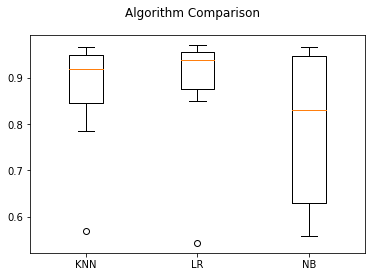

In [210]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Decision Trees

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [130]:
dt_model.score(x_validation, Y_validation)
test_pred = dt_model.predict(x_validation)

In [137]:
print(dt_model.score(x_train, y_train))
print(dt_model.score(x_validation, Y_validation))



1.0
0.8779121203184901


# Reduce Overfitting

In [138]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_validation, Y_validation))

0.8889626188896262
0.8898554998525509


In [139]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))#Print the feature importance of the decision model

                  Imp
Age          0.057332
Job          0.000000
Marital      0.000000
Education    0.000000
Default      0.000000
Balance      0.000000
Housing      0.126562
Loan         0.000000
Contact      0.039346
Day_of_week  0.000000
Month        0.000000
Duration     0.668007
Campaign     0.000000
Pday         0.108754
Previous     0.000000
Poutcome     0.000000


0.8898554998525509


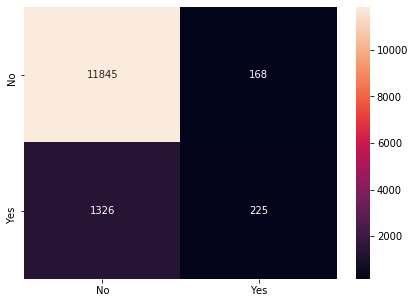

In [140]:
print(dTreeR.score(x_validation , Y_validation))
y_predict = dTreeR.predict(x_validation)

cm=metrics.confusion_matrix(Y_validation, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [211]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
acc_DT =  accuracy_score(Y_validation, y_predict)

In [212]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.907771


#                             Ensemble Learning - Bagging

In [146]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.9058537304629902


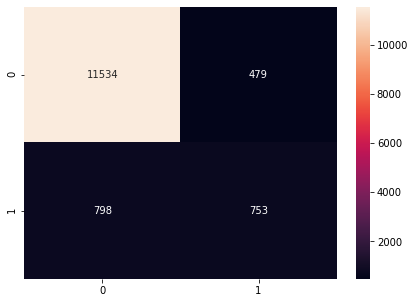

In [147]:
y_predict = bgcl.predict(x_validation)

print(bgcl.score(x_validation , Y_validation))

cm=metrics.confusion_matrix(Y_validation, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in [0,1]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [165]:
pred_BG =bgcl.predict(x_validation)
acc_BG = accuracy_score(Y_validation, pred_BG)

In [213]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.907771
0,Bagging,0.905854


# Ensemble Learning - AdaBoosting

In [148]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)


0.8880861102919493


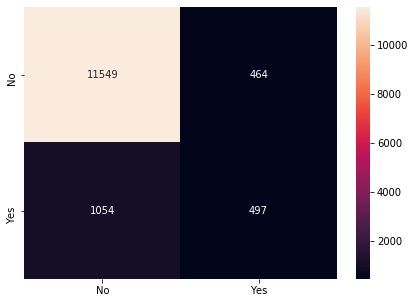

In [149]:
y_predict = abcl.predict(x_validation)
print(abcl.score(x_validation , Y_validation))

cm=metrics.confusion_matrix(Y_validation, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [163]:
pred_AB =abcl.predict(x_validation)
acc_AB = accuracy_score(Y_validation, pred_AB)

In [214]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.907771
0,Bagging,0.905854
0,Adaboost,0.888086


#                     Ensemble Learning - GradientBoost

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.9015777056915364


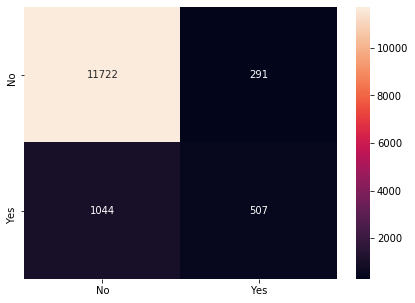

In [151]:
y_predict = gbcl.predict(x_validation)
print(gbcl.score(x_validation, Y_validation))
cm=metrics.confusion_matrix(Y_validation, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [167]:
pred_GB =gbcl.predict(x_validation)
acc_GB = accuracy_score(Y_validation, pred_GB)

In [215]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.907771
0,Bagging,0.905854
0,Adaboost,0.888086
0,Gradient Boost,0.901578


# Ensemble RandomForest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)


0.907770569153642


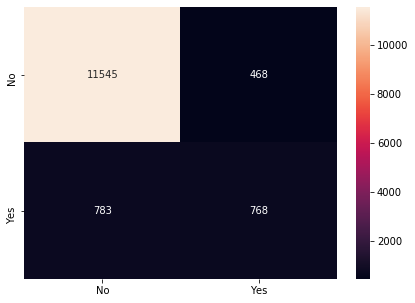

In [153]:
y_predict = rfcl.predict(x_validation)
print(rfcl.score(x_validation, Y_validation))
cm=metrics.confusion_matrix(Y_validation, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [161]:
pred_RF = rfcl.predict(x_validation)
acc_RF = accuracy_score(Y_validation, pred_RF)

In [216]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.907771
0,Bagging,0.905854
0,Adaboost,0.888086
0,Gradient Boost,0.901578
0,Random Forest,0.907771


## Summary


- The aim of the Bank is to get customers to subscribe term deposit. 
- They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. 
- Three classification algorithms were used in this study and Decision tree and ensemble models were used in model building. 
- It seems like amongst classification models <strong>'Logistic Regression'</strong> algorithm have the highest accuracy and we can choose that as our final model, but when compared to ensemble models except Adaboost all the other models gives 90% accuracy which means that <strong>Decision tree and Ensemble models</strong> are the best models and should be used to predict customers subscription to term deposits.